In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import random


In [61]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

new_X_train = X_train.reshape(*X_train.shape[:1], -1)
new_X_test = X_test.reshape(*X_test.shape[:1], -1)
X_train = np.transpose(new_X_train) / 255

X_test = np.transpose(new_X_test) / 255


In [62]:
class NeuralNetwork:
  __W = {}
  __b = {}

  def __init__(self):
      self.__W[1] = np.random.rand(10, 784) - 0.5
      self.__b[1] = np.random.rand(10, 1) - 0.5
      self.__W[2] = np.random.rand(10, 10) - 0.5
      self.__b[2] = np.random.rand(10, 1) - 0.5     

  def __ReLU(self, Z):
      return np.maximum(Z, 0)

  def __softmax(self, Z):
      A = np.exp(Z) / sum(np.exp(Z))
      return A
      
  def __forward_prop(self, X):
    Z = {}
    A = {}
    Z[1] = self.__W[1].dot(X) + self.__b[1]
    A[1] = self.__ReLU(Z[1])
    Z[2] = self.__W[2].dot(A[1]) + self.__b[2]
    A[2] = self.__softmax(Z[2])
    return Z, A

  def __ReLU_deriv(self, Z):
      return Z > 0

  def __one_hot(self, Y):
      one_hot_Y = np.zeros((Y.size, Y.max() + 1))
      one_hot_Y[np.arange(Y.size), Y] = 1
      one_hot_Y = one_hot_Y.T
      return one_hot_Y

  def __backward_prop(self, Z, A, X, Y):
      dZ = {}
      dW = {}
      db = {}
      m = X.shape[1]
      one_hot_Y = self.__one_hot(Y)
      dZ[2] = A[2] - one_hot_Y
      dW[2] = 1 / m * dZ[2].dot(A[1].T)
      db[2] = 1 / m * np.sum(dZ[2])
      dZ[1] = self.__W[2].T.dot(dZ[2]) * self.__ReLU_deriv(Z[1])
      dW[1] = 1 / m * dZ[1].dot(X.T)
      db[1] = 1 / m * np.sum(dZ[1])
      return dW, db

  def __update_params(self, dW, db, alpha):
    self.__W[1] = self.__W[1] - alpha * dW[1]
    self.__b[1] = self.__b[1] - alpha * db[1]
    self.__W[2] = self.__W[2] - alpha * dW[2]
    self.__b[2] = self.__b[2] - alpha * db[2]
    #return self.W, self.b
  
  def __get_predictions(self, A):
      return np.argmax(A[2], 0)

  def __get_accuracy(self, predictions, Y):
      print("Predictions: " + str(predictions))
      print("Actual labels: " + str(Y))
      return np.sum(predictions == Y) / Y.size

  def __gradient_descent(self, X, Y, alpha, iterations):
      for i in range(iterations):
          Z, A = self.__forward_prop(X)
          dW, db = self.__backward_prop(Z, A, X, Y)
          self.__update_params(dW, db, alpha)
          if (i+1) % 10 == 0:
              print("Iteration: ", i+1)
              predictions = self.__get_predictions(A)
              print("Accuracy: " + str(self.__get_accuracy(predictions, Y)))

  def __test_prediction(self, index):
      current_image = X_train[:, index, None]
      print("The shape is now:")
      print(current_image.shape)
      prediction = self.__make_predictions(X_train[:, index, None])
      label = Y_train[index]
      print("Prediction: ", prediction)
      print("Label: ", label)
      
      current_image = current_image.reshape((28, 28)) * 255
      plt.gray()
      plt.imshow(current_image, interpolation='nearest')
      plt.show()
  
  def fit(self, X_train, Y_train, learning_rate, epochs):
    self.__gradient_descent(X_train, Y_train, learning_rate, epochs)
  
  def predict(self, X):
    _, A = self.__forward_prop(X)
    predictions = self.__get_predictions(A)
    return predictions

  def visualise_predictions(self, X_test, predictions, labels = None, index=None, n_examples = 5):
    if index is None:
      indexes = random.sample(range(1, len(predictions)), n_examples)
    else:
      indexes = [index]
    for i in indexes:
      image = X_test[:, i, None]
      image = image.reshape((28, 28)) * 255
      plt.gray()
      plt.imshow(image, interpolation='nearest')
      plt.show()
      print("Prediction: ", predictions[i])
      if labels is not None:
        print("Actual label: ", labels[i], "\n")

In [63]:
model = NeuralNetwork()

In [64]:
model.fit(X_train, Y_train, 0.8, 400)

Iteration:  10
Predictions: [6 0 4 ... 6 6 5]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.35126666666666667
Iteration:  20
Predictions: [3 0 4 ... 5 6 8]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.5228833333333334
Iteration:  30
Predictions: [0 0 4 ... 0 6 6]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.3909166666666667
Iteration:  40
Predictions: [3 0 4 ... 0 6 6]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.64475
Iteration:  50
Predictions: [5 0 4 ... 5 6 6]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.7056166666666667
Iteration:  60
Predictions: [5 0 4 ... 5 6 6]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.6327333333333334
Iteration:  70
Predictions: [5 0 9 ... 5 6 8]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.6707333333333333
Iteration:  80
Predictions: [3 0 9 ... 5 6 8]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.6633
Iteration:  90
Predictions: [3 0 9 ... 5 6 8]
Actual labels: [5 0 4 ... 5 6 8]
Accuracy: 0.6965333333333333
Iteration:  100
Predictions: [3 0 4 ... 5 6 8]
Act

In [65]:
predictions = model.predict(X_test)

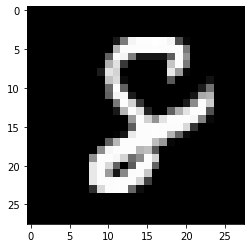

Prediction:  6
Actual label:  8 



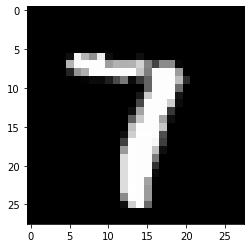

Prediction:  7
Actual label:  7 



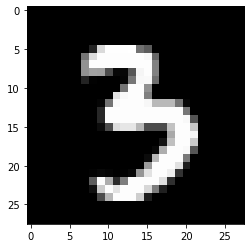

Prediction:  5
Actual label:  3 



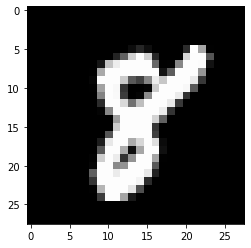

Prediction:  8
Actual label:  8 



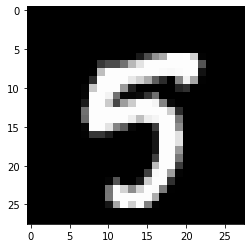

Prediction:  5
Actual label:  5 



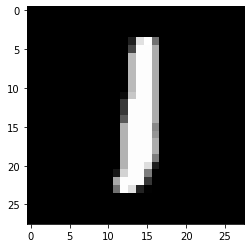

Prediction:  1
Actual label:  1 



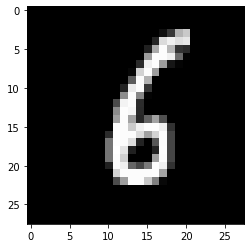

Prediction:  6
Actual label:  6 



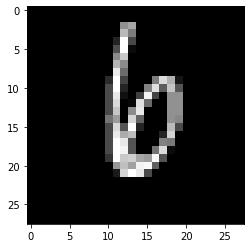

Prediction:  2
Actual label:  6 



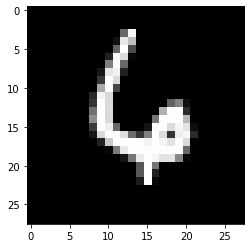

Prediction:  4
Actual label:  6 



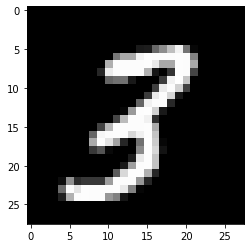

Prediction:  8
Actual label:  3 



In [66]:
model.visualise_predictions(X_test, predictions, Y_test, n_examples=10)